<a href="https://colab.research.google.com/github/samtam0714/ML/blob/master/RegTreeNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load Dataset
data=pd.read_csv('./mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
data2=data.drop('model',axis=1)
data2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#Show Key Statistics
data2.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
# Overview of Dataset Characteristics
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [ ]:
#Summary of N/A Values
data2.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

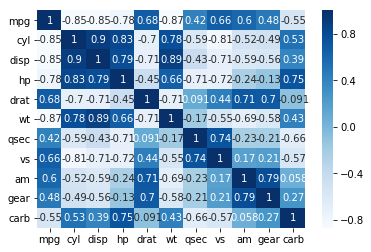

In [ ]:
#Visualization of Correlations
import seaborn as sns
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

In [ ]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(data2.drop('mpg',axis=1),0.8)
print('Correlated columns:',col)

Correlated columns: {'hp', 'wt', 'disp', 'vs'}


In [ ]:
#Define x and y variable
x = data2.drop('mpg',axis=1).values
y = data2['mpg'].values

In [ ]:
#Load Library for Training Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

In [ ]:
#Script for Regression Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

for name,method in [('Decision Tree', DecisionTreeRegressor(random_state=100))]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))

#MAE,MSE and RMSE

print('R2: {:.2f}'.format(r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Decision Tree
R2: 0.48
Mean Absolute Error: 3.61
Mean Squared Error: 13.57
Root Mean Squared Error: 3.68


In [ ]:
# Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train2,
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=1)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))

    plt.plot(train_sizes, train_mean,color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left')
    plt.ylim([-1,10])
    plt.show()

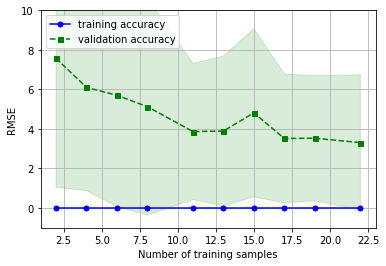

In [ ]:
#Plot Learning Curve
dt_model=DecisionTreeRegressor(random_state=100)
plot_learning_curves(dt_model)

In [ ]:
#Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

dt3=DecisionTreeRegressor(random_state=100)
max_depth = range(1,100)
param_grid3 = {'criterion':['mse','friedman_mse','mae'],'max_depth':max_depth}
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
dt3_model = GridSearchCV(dt3, param_grid3, cv=cv2, verbose=0,scoring = 'neg_mean_squared_error',n_jobs=-1)

grids = [dt3_model]
grid_dict = {0:'dt'}

#Model Creation
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Optimized Model')

#Fit the grid search objects
for idx, optmodel in enumerate(grids):
     print('\nEstimator: {}'.format(grid_dict[idx]))
     #Fit grid search
     optmodel.fit(x_train2, y_train)
     #Best params
     print('Best params: {}'.format(optmodel.best_params_))
     # Predict on test data with best params
     y_pred3 = optmodel.predict(x_test2)
     # Test data accuracy of model with best params
     print('R2: %.2f'% r2_score(y_test, y_pred3))
     print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_pred3)))
     print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, y_pred3)))
     print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))

Optimized Model

Estimator: dt
Best params: {'criterion': 'mae', 'max_depth': 3}
R2: 0.73
Mean Absolute Error: 2.35
Mean Squared Error: 7.00
Root Mean Squared Error: 2.65


C:\Users\100274743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# Nested CV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#Scale x variables
x_2 = sc.fit_transform(x)

#Nested CV

for idx, optmodel in enumerate(grids):

    scores = cross_val_score(optmodel, x_2, y,
                             scoring='neg_mean_squared_error', cv=5,
                             n_jobs= -1)

    print('\nEstimator: {}'.format(grid_dict[idx]))
    print ('NestedCV RMSE:{:0.2f} +/-{:0.2f} '.format(np.sqrt(np.mean(-scores)),np.sqrt(np.std(-scores))))


Estimator: dt
NestedCV RMSE:4.21 +/-2.72 


In [ ]:
#Prediction Dataset

raw_data = {'cyl':[6],'dist':[200],'hp':[175],'drat':[3.00],'wt':[2.800],'qsec':[17.00],
            'vs':[1],'am':[0],'gear':[4],'carb':[4]}

dfnew=pd.DataFrame(raw_data, columns = ['cyl', 'dist', 'hp', 'drat', 'wt', 'qsec',
                                      'vs','am','gear','carb'])

dfnew

,cyl,dist,hp,drat,wt,qsec,vs,am,gear,carb
0,6,200,175,3.0,2.8,17.0,1,0,4,4


In [ ]:
#Prediction
print('Predicted mpg: {:0.2f}'.format(float(dt3_model.predict(dfnew))))

Predicted mpg: 14.50


In [ ]:
#Feature Importance - optimized
for name, score in zip(list(data2),dt3_model.best_estimator_.feature_importances_):
    print(name, round(score,2))

mpg 0.0
cyl 0.29
disp 0.61
hp 0.11
drat 0.0
wt 0.0
qsec 0.0
vs 0.0
am 0.0
gear 0.0
